In [1]:
import os
import pickle

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.listdir('data')

['TSC_Price_Changes.csv',
 'Price_and_sales',
 '.ipynb_checkpoints',
 'Competitors_Price_Changes.csv',
 'competitors',
 'TSC_Sales_Data.csv']

In [3]:
def to_date(string):
    try:
        converted = pd.to_datetime(string)
    except:
        converted = np.NaN
    return converted

In [4]:
price_changes = pd.read_csv(
    'data/TSC_Price_Changes.csv',
    converters={
        1: to_date,
        2: to_date
    }
    
)
competitors_changes = pd.read_csv(
    'data/Competitors_Price_Changes.csv',
    converters = {
        0: to_date
    }
)
tsc_sales = pd.read_csv(
    'data/TSC_Sales_Data.csv',
    converters = {
        1: to_date
    },

)

In [5]:
display(price_changes.info())
print()
display(competitors_changes.info())
print()
display(tsc_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SCRUB_ITEM        3886 non-null   int64         
 1   PRICE_START_DATE  3886 non-null   datetime64[ns]
 2   PRICE_END_DATE    3815 non-null   datetime64[ns]
 3   TSC_PRICE         3886 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 121.6 KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90953 entries, 0 to 90952
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SCAN_DATE_TIME               90953 non-null  datetime64[ns]
 1   SCRUB_ITEM                   90953 non-null  int64         
 2   SCRUB_COMPETITOR             90953 non-null  int64         
 3   TSC_PRICE                    90953 non-null  float64       
 4   COMPETITOR_PRICE             90953 non-null  float64       
 5   CPI_COMPETITIVE_PRICE_INDEX  90953 non-null  float64       
 6   COMPETITOR_SHIPPING          51396 non-null  float64       
 7   COMPETITOR_REG_PRICE         90953 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 5.6 MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70829 entries, 0 to 70828
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SCRUB_ITEM      70829 non-null  int64         
 1   TIME_DIM_KEY    70829 non-null  datetime64[ns]
 2   SCRUB_TRANS_NO  70829 non-null  int64         
 3   TRANS_SEQ_NO    70829 non-null  int64         
 4   UNIT_QTY        70829 non-null  float64       
 5   UNIT_PRICE      70829 non-null  float64       
 6   UNIT_COST       70829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 3.8 MB


None

In [8]:
competitors_groups = competitors_changes.groupby(['SCRUB_COMPETITOR', 'SCRUB_ITEM'])
for (comp, prod), df in competitors_groups:
    filename = f"comp{comp}_prod{prod}.csv"
    df.to_csv(f"data/competitors/{filename}")

<AxesSubplot:>

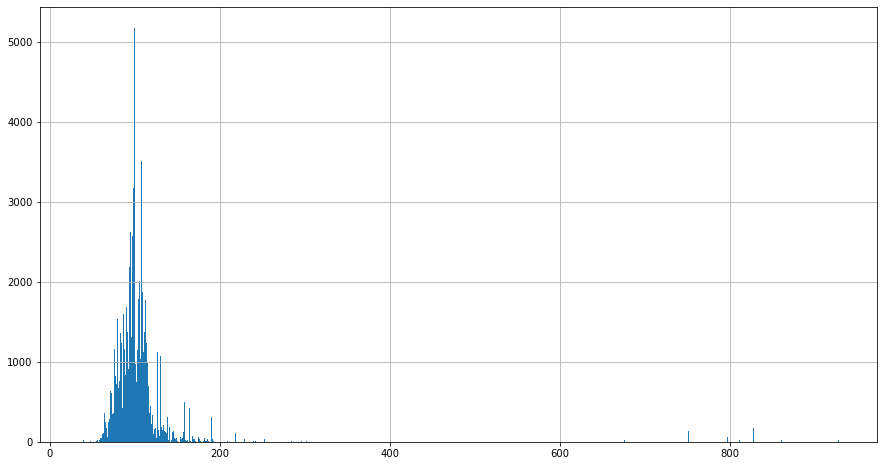

In [9]:
competitors_changes['CPI_COMPETITIVE_PRICE_INDEX'].hist(bins='auto', figsize=(15, 8))

In [10]:
tsc_sales.head()

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST
0,1,2018-04-02,1296,2,2.0,322.99,132.97
1,1,2018-12-06,6878,1,1.0,322.99,132.97
2,1,2018-12-10,7010,2,2.0,322.99,132.97
3,1,2019-02-14,8380,2,1.0,322.99,132.97
4,1,2019-05-02,10639,1,2.0,219.99,132.97


In [13]:
sales_gross_margins = tsc_sales.eval("GROSS_MARGIN = (UNIT_QTY * UNIT_PRICE) - (UNIT_QTY * UNIT_COST)")

In [14]:
sales_gross_margins

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST,GROSS_MARGIN
0,1,2018-04-02,1296,2,2.0,322.99,132.97,380.04
1,1,2018-12-06,6878,1,1.0,322.99,132.97,190.02
2,1,2018-12-10,7010,2,2.0,322.99,132.97,380.04
3,1,2019-02-14,8380,2,1.0,322.99,132.97,190.02
4,1,2019-05-02,10639,1,2.0,219.99,132.97,174.04
...,...,...,...,...,...,...,...,...
70824,97,2021-07-28,70220,1,5.0,19.99,11.70,41.45
70825,97,2021-07-28,70246,1,1.0,19.99,11.70,8.29
70826,97,2021-07-29,70276,1,1.0,19.99,11.70,8.29
70827,97,2021-07-29,70277,1,4.0,19.99,11.70,33.16


<AxesSubplot:xlabel='SCRUB_ITEM'>

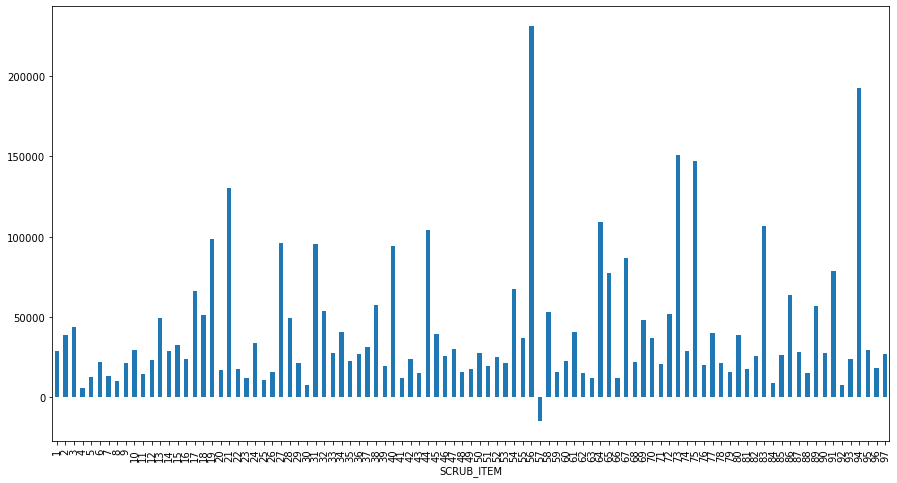

In [15]:
sales_gross_margins.groupby('SCRUB_ITEM')['GROSS_MARGIN'].sum().plot(kind='bar', y='GROSS_MARGIN', figsize=(15, 8))

In [16]:
top_ten_gross_margins = sales_gross_margins.groupby('SCRUB_ITEM')[['GROSS_MARGIN']].sum().sort_values('GROSS_MARGIN', ascending=False).head(10)

Text(0, 0.5, 'Product Number')

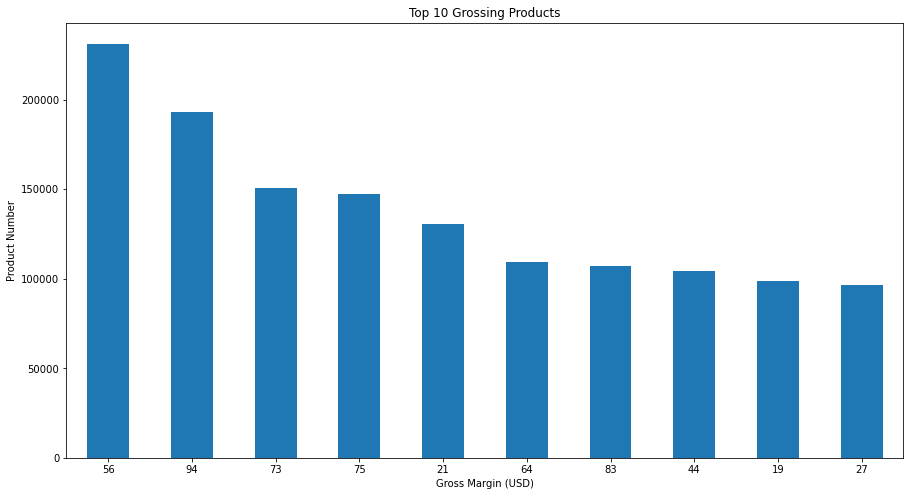

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
top_ten_gross_margins.plot(kind='bar', legend=False, rot=0, ax=ax);
ax.set_title('Top 10 Grossing Products')
ax.set_xlabel('Gross Margin (USD)')
ax.set_ylabel('Product Number')



In [18]:
price_changes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SCRUB_ITEM        3886 non-null   int64         
 1   PRICE_START_DATE  3886 non-null   datetime64[ns]
 2   PRICE_END_DATE    3815 non-null   datetime64[ns]
 3   TSC_PRICE         3886 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 121.6 KB


## Top Grossing Product: 56

In [19]:
product_56 = price_changes.groupby('SCRUB_ITEM').get_group(56)[['TSC_PRICE', 'PRICE_START_DATE']].set_index('PRICE_START_DATE')

In [20]:
product_56.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2019-09-09 to 2021-01-11
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TSC_PRICE  44 non-null     float64
dtypes: float64(1)
memory usage: 704.0 bytes


<AxesSubplot:xlabel='PRICE_START_DATE'>

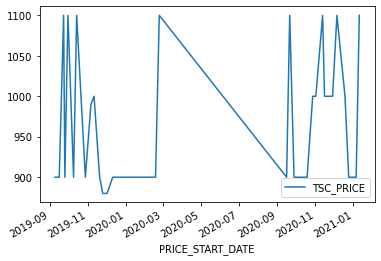

In [21]:
product_56.plot()

In [22]:
product_56_gross_margins = sales_gross_margins.loc[sales_gross_margins['SCRUB_ITEM'] == 56][['TIME_DIM_KEY', 'GROSS_MARGIN']].set_index('TIME_DIM_KEY').groupby('TIME_DIM_KEY').agg('sum')

<AxesSubplot:xlabel='TIME_DIM_KEY'>

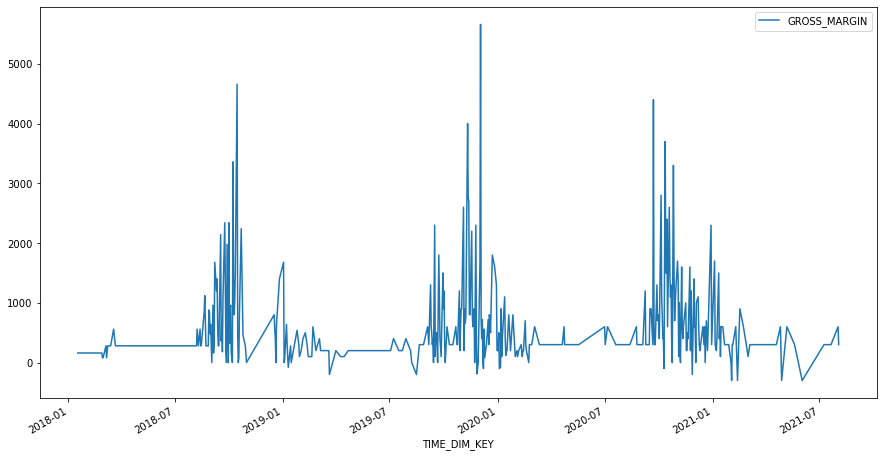

In [23]:
product_56_gross_margins.plot(figsize=(15,8))

In [64]:
tab1 = pd.read_csv(
    'data/Competitors_Price_Changes.csv',
    converters={0: to_date}
)
tab2 = pd.read_csv(
    'data/TSC_Price_Changes.csv',
    converters={1: to_date, 2: to_date}
)
tab3 = pd.read_csv(
    'data/TSC_Sales_Data.csv',
    converters={1: to_date}
).eval("""
GROSS_MARGIN = (UNIT_QTY * UNIT_PRICE) - (UNIT_QTY * UNIT_COST)
""")

display(tab1.info())
display(tab2.info())
display(tab3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90953 entries, 0 to 90952
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SCAN_DATE_TIME               90953 non-null  datetime64[ns]
 1   SCRUB_ITEM                   90953 non-null  int64         
 2   SCRUB_COMPETITOR             90953 non-null  int64         
 3   TSC_PRICE                    90953 non-null  float64       
 4   COMPETITOR_PRICE             90953 non-null  float64       
 5   CPI_COMPETITIVE_PRICE_INDEX  90953 non-null  float64       
 6   COMPETITOR_SHIPPING          51396 non-null  float64       
 7   COMPETITOR_REG_PRICE         90953 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 5.6 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SCRUB_ITEM        3886 non-null   int64         
 1   PRICE_START_DATE  3886 non-null   datetime64[ns]
 2   PRICE_END_DATE    3815 non-null   datetime64[ns]
 3   TSC_PRICE         3886 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 121.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70829 entries, 0 to 70828
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SCRUB_ITEM      70829 non-null  int64         
 1   TIME_DIM_KEY    70829 non-null  datetime64[ns]
 2   SCRUB_TRANS_NO  70829 non-null  int64         
 3   TRANS_SEQ_NO    70829 non-null  int64         
 4   UNIT_QTY        70829 non-null  float64       
 5   UNIT_PRICE      70829 non-null  float64       
 6   UNIT_COST       70829 non-null  float64       
 7   GROSS_MARGIN    70829 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 4.3 MB


None

In [73]:
tab1_item1 = tab1.loc[tab1['SCRUB_ITEM'] == 1, :].set_index('SCAN_DATE_TIME').drop('SCRUB_ITEM', axis=1)

In [74]:
tab1_item1_comp1 = tab1_item1.loc[tab1_item1['SCRUB_COMPETITOR'] == 1, :].drop('SCRUB_COMPETITOR', axis=1)
tab1_item1_comp2 = tab1_item1.loc[tab1_item1['SCRUB_COMPETITOR'] == 2, :].drop('SCRUB_COMPETITOR', axis=1)

In [67]:
tab2_item1 = tab2.loc[tab2['SCRUB_ITEM'] == 1, :].set_index('PRICE_START_DATE').drop(['PRICE_END_DATE', 'SCRUB_ITEM'], axis=1)

In [92]:
tab3_item1 = tab3.loc[tab3['SCRUB_ITEM'] == 1, :].set_index('TIME_DIM_KEY').drop(['SCRUB_TRANS_NO', 'TRANS_SEQ_NO', 'SCRUB_ITEM'], axis=1)
tab3_item1['GROSS_MARGIN'].resample('D')

<AxesSubplot:xlabel='TIME_DIM_KEY'>

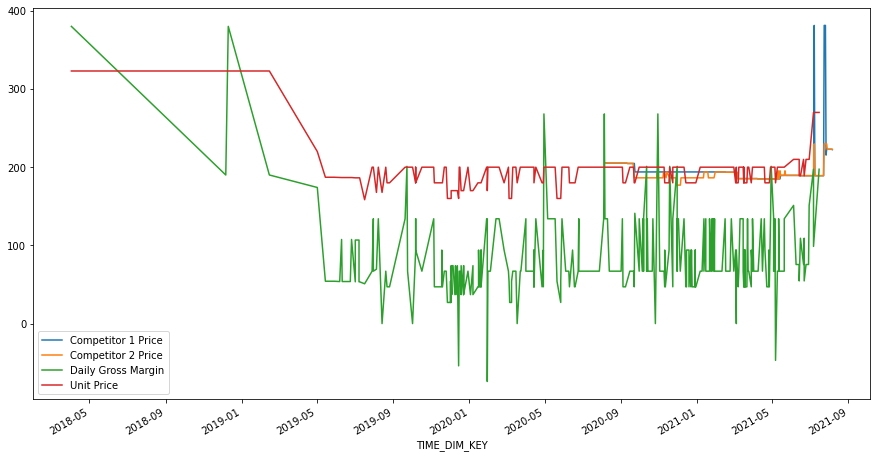

In [95]:
fig, ax = plt.subplots(figsize=(15, 8))

tab1_item1_comp1.plot(y='COMPETITOR_PRICE', ax=ax, label='Competitor 1 Price')
tab1_item1_comp2.plot(y='COMPETITOR_PRICE', ax=ax, label='Competitor 2 Price')

tab3_item1.plot(y='GROSS_MARGIN', ax=ax, label='Daily Gross Margin')
tab3_item1.plot(y='UNIT_PRICE', ax=ax, label='Unit Price')